In [1]:
import PIL
from PIL import Image
import numpy as np
import h5py
import os
from os import listdir
import matplotlib.pyplot as plt

In [2]:
im = Image.open('/media/catia/Lucas/Polavieja01032018_HuC-H2B_longAcquisition2/testImg_f0000996.tif')

In [3]:
imarray=np.array(im)

In [25]:
imarray

array([[400, 411, 399, ..., 412, 412, 414],
       [395, 396, 382, ..., 388, 401, 406],
       [417, 405, 399, ..., 398, 390, 408],
       ...,
       [399, 406, 400, ..., 403, 406, 422],
       [399, 411, 397, ..., 405, 405, 408],
       [402, 407, 405, ..., 411, 401, 414]], dtype=uint16)

In [8]:
np.savetxt('/data/test.csv',imarray,delimiter=",")

In [18]:
hf = h5py.File('data/test.h5', 'w')

In [19]:
hf.create_dataset('dataset_1', data=imarray)

<HDF5 dataset "dataset_1": shape (400, 400), type "<u2">

In [20]:
hf.close()

In [21]:
str1='/media/catia/Lucas/Polavieja01032018_HuC-H2B_longAcquisition2/'

In [22]:
str2='testImg_f0000996.tif'

In [23]:
str1+str2


'/media/catia/Lucas/Polavieja01032018_HuC-H2B_longAcquisition2/testImg_f0000996.tif'

In [24]:
name=str1+str2

In [25]:
im=Image.open(name)

In [26]:
a='testImg_f0000996.tif'

In [29]:
a=a.split('.')

In [31]:
a[0]+'.h5'

'testImg_f0000996.h5'

## Downsample and vectorize the images

In [5]:
dir=os.listdir('/home/catia/Desktop/zebrafish/data')

In [6]:
dir.sort()

In [7]:
dir[0]

'testImg_f0000501.h5'

In [8]:
im=h5py.File("data/"+dir[1],'r+') # d1 is the dictionary key under which the data was saved

In [9]:
data=list(im['d1']) #load the data saved in this file 

In [70]:
data[0:200]

[array([395, 396, 403, 400, 391, 405, 408, 415, 401, 408, 387, 398, 406,
        412, 406, 391, 401, 386, 405, 400, 405, 412, 402, 407, 391, 399,
        409, 411, 394, 393, 403, 394, 399, 413, 403, 389, 401, 401, 404,
        398, 406, 389, 396, 402, 405, 392, 399, 406, 408, 410, 409, 401,
        401, 399, 401, 398, 403, 403, 408, 393, 404, 410, 403, 394, 402,
        398, 402, 405, 400, 407, 395, 396, 390, 412, 410, 411, 396, 407,
        407, 406, 401, 396, 414, 405, 397, 406, 389, 412, 421, 405, 381,
        420, 412, 406, 405, 396, 402, 423, 404, 393, 399, 402, 402, 406,
        408, 392, 405, 417, 405, 419, 404, 410, 399, 421, 403, 407, 402,
        406, 404, 405, 408, 406, 403, 399, 382, 396, 393, 410, 404, 409,
        403, 407, 412, 400, 394, 407, 411, 412, 414, 408, 408, 409, 410,
        404, 397, 407, 395, 412, 402, 400, 402, 413, 411, 406, 417, 402,
        396, 408, 398, 408, 409, 397, 401, 403, 411, 408, 403, 403, 424,
        398, 408, 401, 402, 406, 409, 404, 419, 410

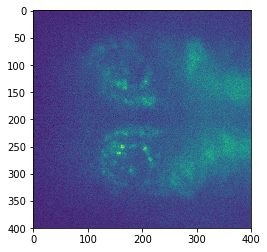

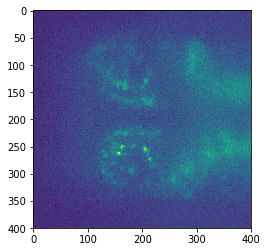

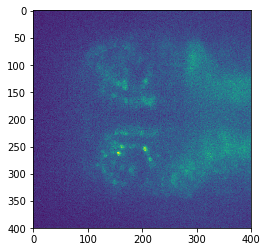

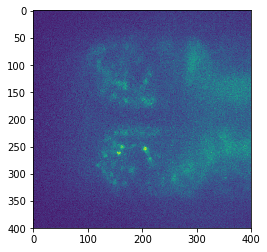

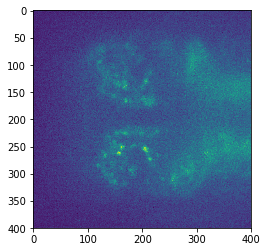

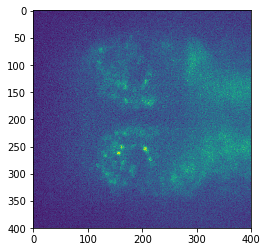

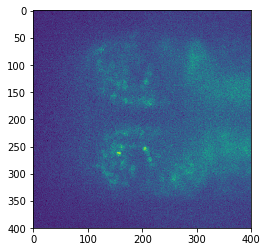

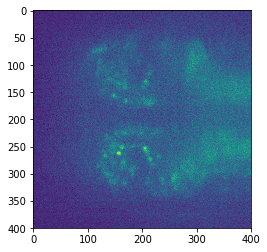

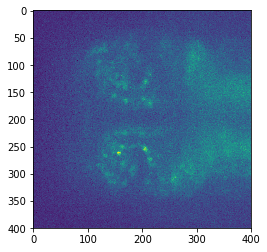

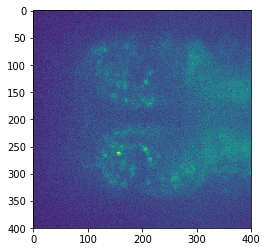

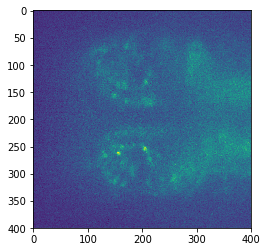

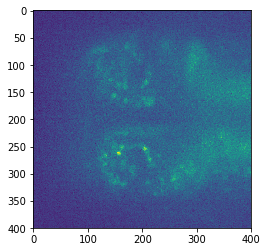

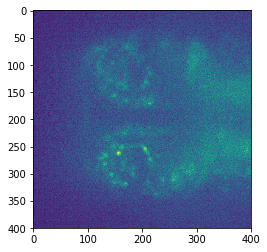

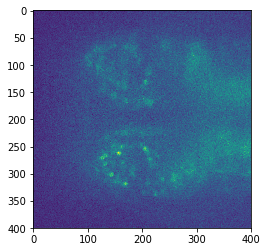

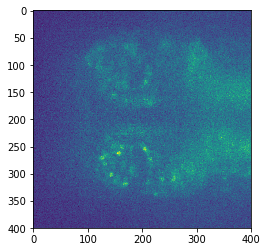

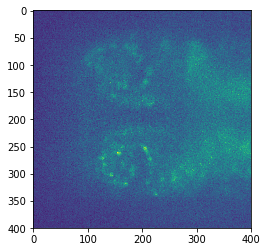

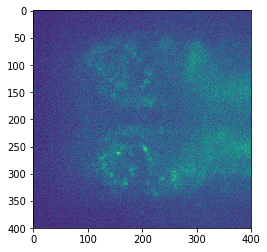

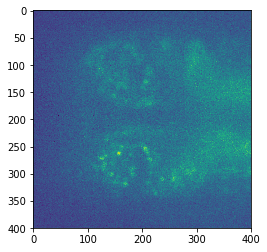

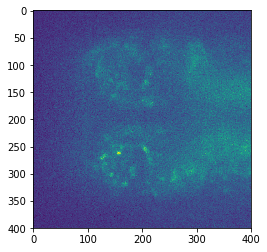

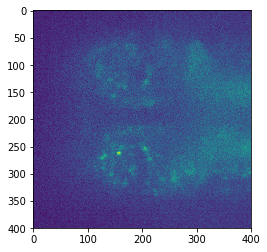

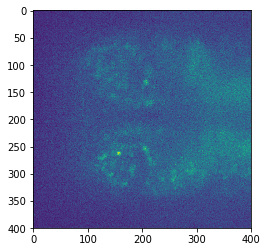

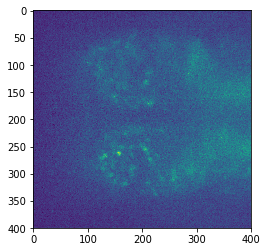

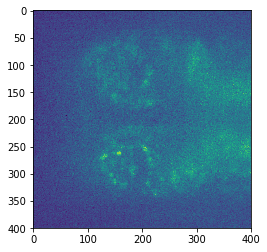

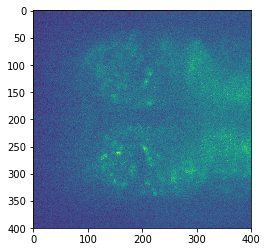

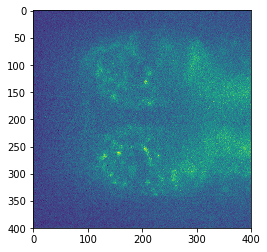

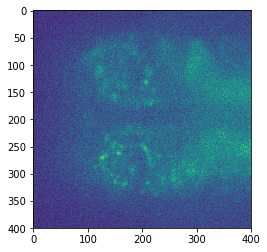

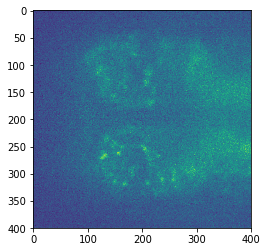

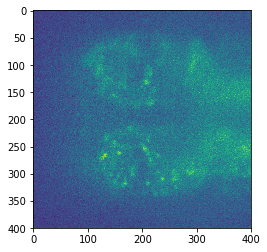

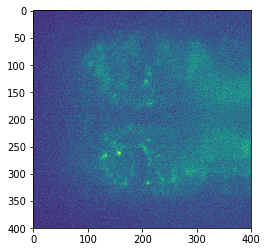

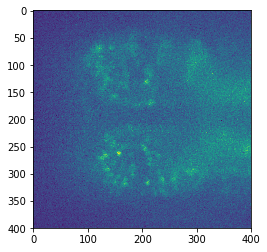

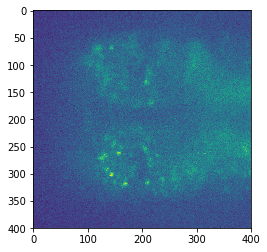

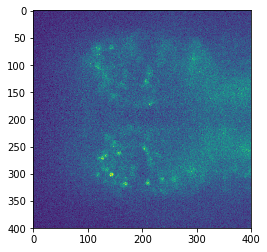

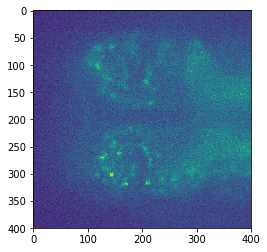

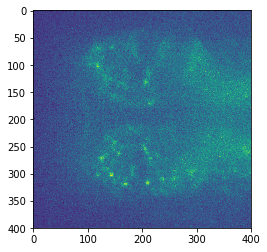

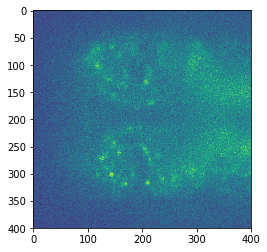

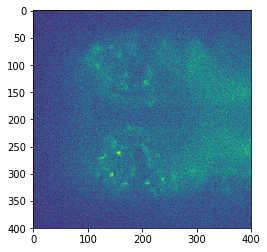

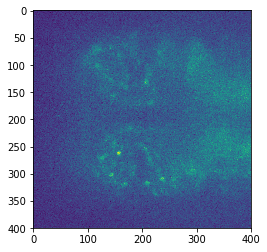

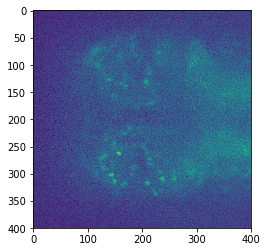

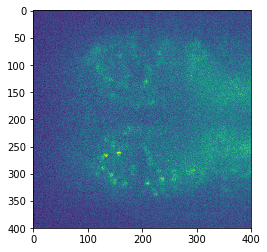

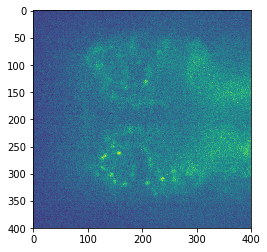

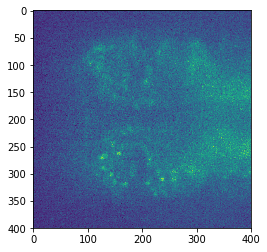

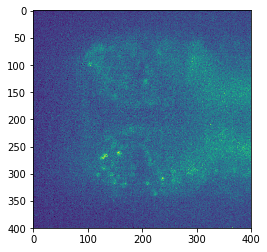

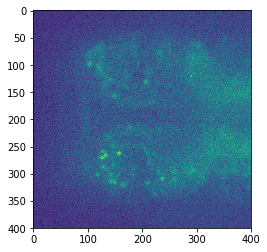

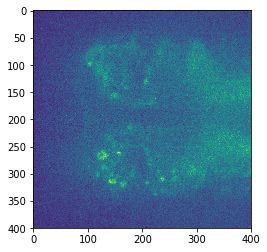

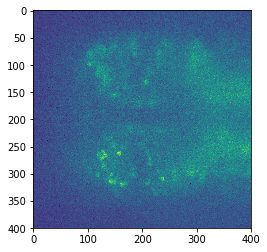

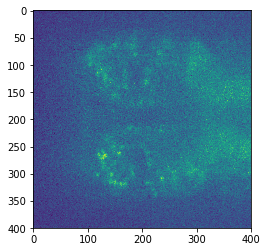

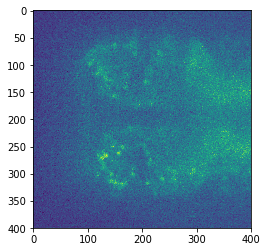

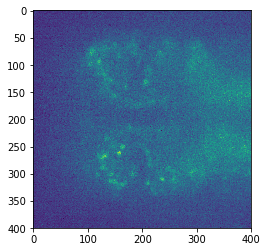

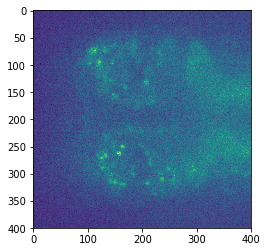

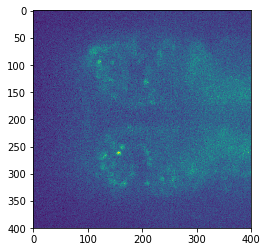

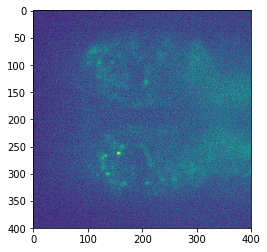

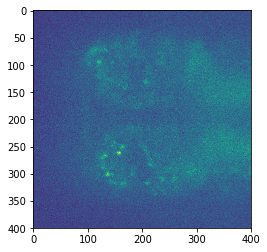

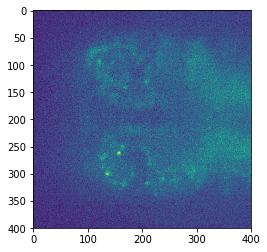

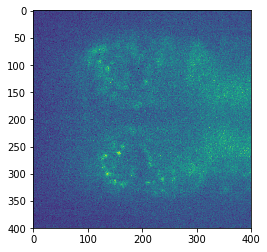

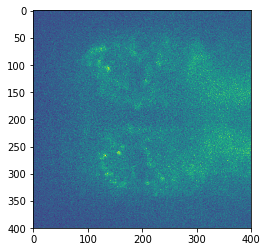

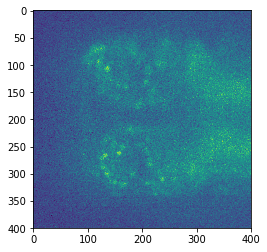

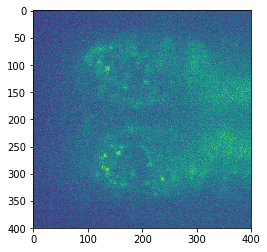

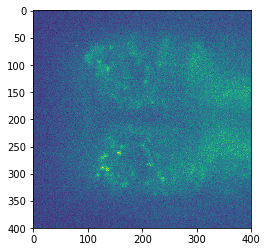

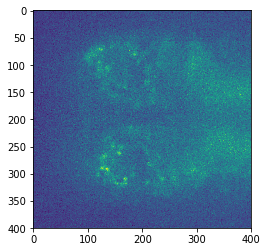

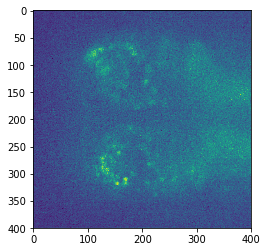

KeyboardInterrupt: 

In [31]:
for i in range(40,len(dir),100):
    im=h5py.File('data/'+dir[i],'r+')
    img=list(im['d1']) 
    plt.imshow(img)
    plt.pause(0.005)
plt.show()
    


In [21]:
dimg=np.zeros((5,5))

In [23]:
for i in range (0,5):
    for j in range (0,5):
        dimg[i,j]=np.mean(np.mean(imarray[i*80:i*80+80,j*80:j*80+80]));

In [12]:
dimg

array([[406.3740625 , 408.339375  , 411.52625   , 413.2140625 ,
        410.60375   ],
       [412.09265625, 425.4809375 , 412.34015625, 425.663125  ,
        421.3159375 ],
       [409.69875   , 432.13953125, 423.52375   , 431.3871875 ,
        439.8175    ],
       [414.97875   , 424.61859375, 415.0396875 , 431.985625  ,
        422.928125  ],
       [406.8365625 , 407.81171875, 411.15359375, 413.58265625,
        411.4434375 ]])

In [13]:
vec=dimg.reshape(-1)

In [14]:
vec

array([406.3740625 , 408.339375  , 411.52625   , 413.2140625 ,
       410.60375   , 412.09265625, 425.4809375 , 412.34015625,
       425.663125  , 421.3159375 , 409.69875   , 432.13953125,
       423.52375   , 431.3871875 , 439.8175    , 414.97875   ,
       424.61859375, 415.0396875 , 431.985625  , 422.928125  ,
       406.8365625 , 407.81171875, 411.15359375, 413.58265625,
       411.4434375 ])

In [15]:
vec=np.transpose(vec)

In [16]:
vec.shape

(25,)

In [114]:
mean=np.mean(data)

mean

In [115]:
mean

457.5439375

## Selec the image from a slice

In [159]:
selectec_slice=40 # number between 1 and 100 ?
total_data=np.zeros((len(dir),25))
labels=np.zeros((len(dir)))
t=0
for i in range(selectec_slice,len(dir),100):
    im=h5py.File('data/'+dir[i],'r+')
    print(dir[i])
    data=list(im['d1'])
    data=np.array(data)
    dimg=np.zeros((5,5))
    for j in range(0,5):
        for k in range(0,5):
            dimg[j,k]=np.mean(data[j*80:j*80+80,k*80:k*80+80])
    vec=dimg.reshape(-1)
    total_data[t]= vec
    
    mean=np.mean(data)
    new_data=data-mean
    left_mean=np.mean(new_data[200:400,:])
    right_mean=np.mean(new_data[0:200,:])
    if left_mean > right_mean:
        labels[t]=0
    else:
        labels[t]=1
    t=t+1
    print(t)

testImg_f0000541.h5
1
testImg_f0000641.h5
2
testImg_f0000741.h5
3
testImg_f0000841.h5
4
testImg_f0000941.h5
5
testImg_f0001041.h5
6
testImg_f0001141.h5
7
testImg_f0001241.h5
8
testImg_f0001341.h5
9
testImg_f0001441.h5
10
testImg_f0001541.h5
11
testImg_f0001641.h5
12
testImg_f0001741.h5
13
testImg_f0001841.h5
14
testImg_f0001941.h5
15
testImg_f0002041.h5
16
testImg_f0002141.h5
17
testImg_f0002241.h5
18
testImg_f0002341.h5
19
testImg_f0002441.h5
20
testImg_f0002541.h5
21
testImg_f0002641.h5
22
testImg_f0002741.h5
23
testImg_f0002841.h5
24
testImg_f0002941.h5
25
testImg_f0003041.h5
26
testImg_f0003141.h5
27
testImg_f0003241.h5
28
testImg_f0003341.h5
29
testImg_f0003441.h5
30
testImg_f0003541.h5
31
testImg_f0003641.h5
32
testImg_f0003741.h5
33
testImg_f0003841.h5
34
testImg_f0003941.h5
35
testImg_f0004041.h5
36
testImg_f0004141.h5
37
testImg_f0004241.h5
38
testImg_f0004341.h5
39
testImg_f0004441.h5
40
testImg_f0004541.h5
41
testImg_f0004641.h5
42
testImg_f0004741.h5
43
testImg_f0004841.h5


349
testImg_f0035441.h5
350
testImg_f0035541.h5
351
testImg_f0035641.h5
352
testImg_f0035741.h5
353
testImg_f0035841.h5
354
testImg_f0035941.h5
355
testImg_f0036041.h5
356
testImg_f0036141.h5
357
testImg_f0036241.h5
358
testImg_f0036341.h5
359
testImg_f0036441.h5
360
testImg_f0036541.h5
361
testImg_f0036641.h5
362
testImg_f0036741.h5
363
testImg_f0036841.h5
364
testImg_f0036941.h5
365
testImg_f0037041.h5
366
testImg_f0037141.h5
367
testImg_f0037241.h5
368
testImg_f0037341.h5
369
testImg_f0037441.h5
370
testImg_f0037541.h5
371
testImg_f0037641.h5
372
testImg_f0037741.h5
373
testImg_f0037841.h5
374
testImg_f0037941.h5
375
testImg_f0038041.h5
376
testImg_f0038141.h5
377
testImg_f0038241.h5
378
testImg_f0038341.h5
379
testImg_f0038441.h5
380
testImg_f0038541.h5
381
testImg_f0038641.h5
382
testImg_f0038741.h5
383
testImg_f0038841.h5
384
testImg_f0038941.h5
385
testImg_f0039041.h5
386
testImg_f0039141.h5
387
testImg_f0039241.h5
388
testImg_f0039341.h5
389
testImg_f0039441.h5
390
testImg_f003

691
testImg_f0069641.h5
692
testImg_f0069741.h5
693
testImg_f0069841.h5
694
testImg_f0069941.h5
695
testImg_f0070041.h5
696
testImg_f0070141.h5
697
testImg_f0070241.h5
698
testImg_f0070341.h5
699
testImg_f0070441.h5
700
testImg_f0070541.h5
701
testImg_f0070641.h5
702
testImg_f0070741.h5
703
testImg_f0070841.h5
704
testImg_f0070941.h5
705
testImg_f0071041.h5
706
testImg_f0071141.h5
707
testImg_f0071241.h5
708
testImg_f0071341.h5
709
testImg_f0071441.h5
710
testImg_f0071541.h5
711
testImg_f0071641.h5
712
testImg_f0071741.h5
713
testImg_f0071841.h5
714
testImg_f0071941.h5
715
testImg_f0072041.h5
716
testImg_f0072141.h5
717
testImg_f0072241.h5
718
testImg_f0072341.h5
719
testImg_f0072441.h5
720
testImg_f0072541.h5
721
testImg_f0072641.h5
722
testImg_f0072741.h5
723
testImg_f0072841.h5
724
testImg_f0072941.h5
725
testImg_f0073041.h5
726
testImg_f0073141.h5
727
testImg_f0073241.h5
728
testImg_f0073341.h5
729
testImg_f0073441.h5
730
testImg_f0073541.h5
731
testImg_f0073641.h5
732
testImg_f007

1032
testImg_f0104741.h5
1033
testImg_f0104841.h5
1034
testImg_f0104941.h5
1035
testImg_f0105041.h5
1036
testImg_f0105141.h5
1037
testImg_f0105241.h5
1038
testImg_f0105341.h5
1039
testImg_f0105441.h5
1040
testImg_f0105541.h5
1041
testImg_f0105641.h5
1042
testImg_f0105741.h5
1043
testImg_f0105841.h5
1044
testImg_f0105941.h5
1045
testImg_f0106041.h5
1046
testImg_f0106141.h5
1047
testImg_f0106241.h5
1048
testImg_f0106341.h5
1049
testImg_f0106441.h5
1050
testImg_f0106541.h5
1051
testImg_f0106641.h5
1052
testImg_f0106741.h5
1053
testImg_f0106841.h5
1054
testImg_f0106941.h5
1055
testImg_f0107041.h5
1056
testImg_f0107141.h5
1057
testImg_f0107241.h5
1058
testImg_f0107341.h5
1059
testImg_f0107441.h5
1060
testImg_f0107541.h5
1061
testImg_f0107641.h5
1062
testImg_f0107741.h5
1063
testImg_f0107841.h5
1064
testImg_f0107941.h5
1065
testImg_f0108041.h5
1066
testImg_f0108141.h5
1067
testImg_f0108241.h5
1068
testImg_f0108341.h5
1069
testImg_f0108441.h5
1070
testImg_f0108541.h5
1071
testImg_f0108641.h5


1363
testImg_f0137841.h5
1364
testImg_f0137941.h5
1365
testImg_f0138041.h5
1366
testImg_f0138141.h5
1367
testImg_f0138241.h5
1368
testImg_f0138341.h5
1369
testImg_f0138441.h5
1370
testImg_f0138541.h5
1371
testImg_f0138641.h5
1372
testImg_f0138741.h5
1373
testImg_f0138841.h5
1374
testImg_f0138941.h5
1375
testImg_f0139041.h5
1376
testImg_f0139141.h5
1377
testImg_f0139241.h5
1378
testImg_f0139341.h5
1379
testImg_f0139441.h5
1380
testImg_f0139541.h5
1381
testImg_f0139641.h5
1382
testImg_f0139741.h5
1383
testImg_f0139841.h5
1384
testImg_f0139941.h5
1385
testImg_f0140041.h5
1386
testImg_f0140141.h5
1387
testImg_f0140241.h5
1388
testImg_f0140341.h5
1389
testImg_f0140441.h5
1390
testImg_f0140541.h5
1391
testImg_f0140641.h5
1392
testImg_f0140741.h5
1393
testImg_f0140841.h5
1394
testImg_f0140941.h5
1395
testImg_f0141041.h5
1396
testImg_f0141141.h5
1397
testImg_f0141241.h5
1398
testImg_f0141341.h5
1399
testImg_f0141441.h5
1400
testImg_f0141541.h5
1401
testImg_f0141641.h5
1402
testImg_f0141741.h5


1695
testImg_f0171041.h5
1696
testImg_f0171141.h5
1697
testImg_f0171241.h5
1698
testImg_f0171341.h5
1699
testImg_f0171441.h5
1700
testImg_f0171541.h5
1701
testImg_f0171641.h5
1702
testImg_f0171741.h5
1703
testImg_f0171841.h5
1704
testImg_f0171941.h5
1705
testImg_f0172041.h5
1706
testImg_f0172141.h5
1707
testImg_f0172241.h5
1708
testImg_f0172341.h5
1709
testImg_f0172441.h5
1710
testImg_f0172541.h5
1711
testImg_f0172641.h5
1712
testImg_f0172741.h5
1713
testImg_f0172841.h5
1714
testImg_f0172941.h5
1715
testImg_f0173041.h5
1716
testImg_f0173141.h5
1717
testImg_f0173241.h5
1718
testImg_f0173341.h5
1719
testImg_f0173441.h5
1720
testImg_f0173541.h5
1721
testImg_f0173641.h5
1722
testImg_f0173741.h5
1723
testImg_f0173841.h5
1724
testImg_f0173941.h5
1725
testImg_f0174041.h5
1726
testImg_f0174141.h5
1727
testImg_f0174241.h5
1728
testImg_f0174341.h5
1729
testImg_f0174441.h5
1730
testImg_f0174541.h5
1731
testImg_f0174641.h5
1732
testImg_f0174741.h5
1733
testImg_f0174841.h5
1734
testImg_f0174941.h5


2024
testImg_f0203941.h5
2025
testImg_f0204041.h5
2026
testImg_f0204141.h5
2027
testImg_f0204241.h5
2028
testImg_f0204341.h5
2029
testImg_f0204441.h5
2030
testImg_f0204541.h5
2031
testImg_f0204641.h5
2032
testImg_f0204741.h5
2033
testImg_f0204841.h5
2034
testImg_f0204941.h5
2035
testImg_f0205041.h5
2036
testImg_f0205141.h5
2037
testImg_f0205241.h5
2038
testImg_f0205341.h5
2039
testImg_f0205441.h5
2040
testImg_f0205541.h5
2041
testImg_f0205641.h5
2042
testImg_f0205741.h5
2043
testImg_f0205841.h5
2044
testImg_f0205941.h5
2045
testImg_f0206041.h5
2046
testImg_f0206141.h5
2047
testImg_f0206241.h5
2048
testImg_f0206341.h5
2049
testImg_f0206441.h5
2050
testImg_f0206541.h5
2051
testImg_f0206641.h5
2052
testImg_f0206741.h5
2053
testImg_f0206841.h5
2054
testImg_f0206941.h5
2055
testImg_f0207041.h5
2056
testImg_f0207141.h5
2057
testImg_f0207241.h5
2058
testImg_f0207341.h5
2059
testImg_f0207441.h5
2060
testImg_f0207541.h5
2061
testImg_f0207641.h5
2062
testImg_f0207741.h5
2063
testImg_f0207841.h5


2355
testImg_f0237041.h5
2356
testImg_f0237141.h5
2357
testImg_f0237241.h5
2358
testImg_f0237341.h5
2359
testImg_f0237441.h5
2360
testImg_f0237541.h5
2361
testImg_f0237641.h5
2362
testImg_f0237741.h5
2363
testImg_f0237841.h5
2364
testImg_f0237941.h5
2365
testImg_f0238041.h5
2366
testImg_f0238141.h5
2367
testImg_f0238241.h5
2368
testImg_f0238341.h5
2369
testImg_f0238441.h5
2370
testImg_f0238541.h5
2371
testImg_f0238641.h5
2372
testImg_f0238741.h5
2373
testImg_f0238841.h5
2374
testImg_f0238941.h5
2375
testImg_f0239041.h5
2376
testImg_f0239141.h5
2377
testImg_f0239241.h5
2378
testImg_f0239341.h5
2379
testImg_f0239441.h5
2380
testImg_f0239541.h5
2381
testImg_f0239641.h5
2382
testImg_f0239741.h5
2383
testImg_f0239841.h5
2384
testImg_f0239941.h5
2385
testImg_f0240041.h5
2386
testImg_f0240141.h5
2387
testImg_f0240241.h5
2388
testImg_f0240341.h5
2389
testImg_f0240441.h5
2390
testImg_f0240541.h5
2391
testImg_f0240641.h5
2392
testImg_f0240741.h5
2393
testImg_f0240841.h5
2394
testImg_f0240941.h5


2686
testImg_f0270141.h5
2687
testImg_f0270241.h5
2688
testImg_f0270341.h5
2689
testImg_f0270441.h5
2690
testImg_f0270541.h5
2691
testImg_f0270641.h5
2692
testImg_f0270741.h5
2693
testImg_f0270841.h5
2694
testImg_f0270941.h5
2695
testImg_f0271041.h5
2696
testImg_f0271141.h5
2697
testImg_f0271241.h5
2698
testImg_f0271341.h5
2699
testImg_f0271441.h5
2700
testImg_f0271541.h5
2701
testImg_f0271641.h5
2702
testImg_f0271741.h5
2703
testImg_f0271841.h5
2704
testImg_f0271941.h5
2705
testImg_f0272041.h5
2706
testImg_f0272141.h5
2707
testImg_f0272241.h5
2708
testImg_f0272341.h5
2709
testImg_f0272441.h5
2710
testImg_f0272541.h5
2711
testImg_f0272641.h5
2712
testImg_f0272741.h5
2713
testImg_f0272841.h5
2714
testImg_f0272941.h5
2715
testImg_f0273041.h5
2716
testImg_f0273141.h5
2717
testImg_f0273241.h5
2718
testImg_f0273341.h5
2719
testImg_f0273441.h5
2720
testImg_f0273541.h5
2721
testImg_f0273641.h5
2722
testImg_f0273741.h5
2723
testImg_f0273841.h5
2724
testImg_f0273941.h5
2725
testImg_f0274041.h5


3018
testImg_f0303341.h5
3019
testImg_f0303441.h5
3020
testImg_f0303541.h5
3021
testImg_f0303641.h5
3022
testImg_f0303741.h5
3023
testImg_f0303841.h5
3024
testImg_f0303941.h5
3025
testImg_f0304041.h5
3026
testImg_f0304141.h5
3027
testImg_f0304241.h5
3028
testImg_f0304341.h5
3029
testImg_f0304441.h5
3030
testImg_f0304541.h5
3031
testImg_f0304641.h5
3032
testImg_f0304741.h5
3033
testImg_f0304841.h5
3034
testImg_f0304941.h5
3035
testImg_f0305041.h5
3036
testImg_f0305141.h5
3037
testImg_f0305241.h5
3038
testImg_f0305341.h5
3039
testImg_f0305441.h5
3040
testImg_f0305541.h5
3041
testImg_f0305641.h5
3042
testImg_f0305741.h5
3043
testImg_f0305841.h5
3044
testImg_f0305941.h5
3045
testImg_f0306041.h5
3046
testImg_f0306141.h5
3047
testImg_f0306241.h5
3048
testImg_f0306341.h5
3049
testImg_f0306441.h5
3050
testImg_f0306541.h5
3051
testImg_f0306641.h5
3052
testImg_f0306741.h5
3053
testImg_f0306841.h5
3054
testImg_f0306941.h5
3055
testImg_f0307041.h5
3056
testImg_f0307141.h5
3057
testImg_f0307241.h5


3349
testImg_f0336441.h5
3350
testImg_f0336541.h5
3351
testImg_f0336641.h5
3352
testImg_f0336741.h5
3353
testImg_f0336841.h5
3354
testImg_f0336941.h5
3355
testImg_f0337041.h5
3356
testImg_f0337141.h5
3357
testImg_f0337241.h5
3358
testImg_f0337341.h5
3359
testImg_f0337441.h5
3360
testImg_f0337541.h5
3361
testImg_f0337641.h5
3362
testImg_f0337741.h5
3363
testImg_f0337841.h5
3364
testImg_f0337941.h5
3365
testImg_f0338041.h5
3366
testImg_f0338141.h5
3367
testImg_f0338241.h5
3368
testImg_f0338341.h5
3369
testImg_f0338441.h5
3370
testImg_f0338541.h5
3371
testImg_f0338641.h5
3372
testImg_f0338741.h5
3373
testImg_f0338841.h5
3374
testImg_f0338941.h5
3375
testImg_f0339041.h5
3376
testImg_f0339141.h5
3377
testImg_f0339241.h5
3378
testImg_f0339341.h5
3379
testImg_f0339441.h5
3380
testImg_f0339541.h5
3381
testImg_f0339641.h5
3382
testImg_f0339741.h5
3383
testImg_f0339841.h5
3384
testImg_f0339941.h5
3385
testImg_f0340041.h5
3386
testImg_f0340141.h5
3387
testImg_f0340241.h5
3388
testImg_f0340341.h5


3680
testImg_f0369541.h5
3681
testImg_f0369641.h5
3682
testImg_f0369741.h5
3683
testImg_f0369841.h5
3684
testImg_f0369941.h5
3685
testImg_f0370041.h5
3686
testImg_f0370141.h5
3687
testImg_f0370241.h5
3688
testImg_f0370341.h5
3689
testImg_f0370441.h5
3690
testImg_f0370541.h5
3691
testImg_f0370641.h5
3692
testImg_f0370741.h5
3693
testImg_f0370841.h5
3694
testImg_f0370941.h5
3695
testImg_f0371041.h5
3696
testImg_f0371141.h5
3697
testImg_f0371241.h5
3698
testImg_f0371341.h5
3699
testImg_f0371441.h5
3700
testImg_f0371541.h5
3701
testImg_f0371641.h5
3702
testImg_f0371741.h5
3703
testImg_f0371841.h5
3704
testImg_f0371941.h5
3705
testImg_f0372041.h5
3706
testImg_f0372141.h5
3707
testImg_f0372241.h5
3708
testImg_f0372341.h5
3709
testImg_f0372441.h5
3710
testImg_f0372541.h5
3711
testImg_f0372641.h5
3712
testImg_f0372741.h5
3713
testImg_f0372841.h5
3714
testImg_f0372941.h5
3715
testImg_f0373041.h5
3716
testImg_f0373141.h5
3717
testImg_f0373241.h5
3718
testImg_f0373341.h5
3719
testImg_f0373441.h5


4009
testImg_f0402441.h5
4010
testImg_f0402541.h5
4011
testImg_f0402641.h5
4012
testImg_f0402741.h5
4013
testImg_f0402841.h5
4014
testImg_f0402941.h5
4015
testImg_f0403041.h5
4016
testImg_f0403141.h5
4017
testImg_f0403241.h5
4018
testImg_f0403341.h5
4019
testImg_f0403441.h5
4020
testImg_f0403541.h5
4021
testImg_f0403641.h5
4022
testImg_f0403741.h5
4023
testImg_f0403841.h5
4024
testImg_f0403941.h5
4025
testImg_f0404041.h5
4026
testImg_f0404141.h5
4027
testImg_f0404241.h5
4028
testImg_f0404341.h5
4029
testImg_f0404441.h5
4030
testImg_f0404541.h5
4031
testImg_f0404641.h5
4032
testImg_f0404741.h5
4033
testImg_f0404841.h5
4034
testImg_f0404941.h5
4035
testImg_f0405041.h5
4036
testImg_f0405141.h5
4037
testImg_f0405241.h5
4038
testImg_f0405341.h5
4039
testImg_f0405441.h5
4040
testImg_f0405541.h5
4041
testImg_f0405641.h5
4042
testImg_f0405741.h5
4043
testImg_f0405841.h5
4044
testImg_f0405941.h5
4045
testImg_f0406041.h5
4046
testImg_f0406141.h5
4047
testImg_f0406241.h5
4048
testImg_f0406341.h5


4342
testImg_f0435741.h5
4343
testImg_f0435841.h5
4344
testImg_f0435941.h5
4345
testImg_f0436041.h5
4346
testImg_f0436141.h5
4347
testImg_f0436241.h5
4348
testImg_f0436341.h5
4349
testImg_f0436441.h5
4350
testImg_f0436541.h5
4351
testImg_f0436641.h5
4352
testImg_f0436741.h5
4353
testImg_f0436841.h5
4354
testImg_f0436941.h5
4355
testImg_f0437041.h5
4356
testImg_f0437141.h5
4357
testImg_f0437241.h5
4358
testImg_f0437341.h5
4359
testImg_f0437441.h5
4360
testImg_f0437541.h5
4361
testImg_f0437641.h5
4362
testImg_f0437741.h5
4363
testImg_f0437841.h5
4364
testImg_f0437941.h5
4365
testImg_f0438041.h5
4366
testImg_f0438141.h5
4367
testImg_f0438241.h5
4368
testImg_f0438341.h5
4369
testImg_f0438441.h5
4370
testImg_f0438541.h5
4371
testImg_f0438641.h5
4372
testImg_f0438741.h5
4373
testImg_f0438841.h5
4374
testImg_f0438941.h5
4375
testImg_f0439041.h5
4376
testImg_f0439141.h5
4377
testImg_f0439241.h5
4378
testImg_f0439341.h5
4379
testImg_f0439441.h5
4380
testImg_f0439541.h5
4381
testImg_f0439641.h5


4672
testImg_f0468741.h5
4673
testImg_f0468841.h5
4674
testImg_f0468941.h5
4675
testImg_f0469041.h5
4676
testImg_f0469141.h5
4677
testImg_f0469241.h5
4678
testImg_f0469341.h5
4679
testImg_f0469441.h5
4680
testImg_f0469541.h5
4681
testImg_f0469641.h5
4682
testImg_f0469741.h5
4683
testImg_f0469841.h5
4684
testImg_f0469941.h5
4685
testImg_f0470041.h5
4686
testImg_f0470141.h5
4687
testImg_f0470241.h5
4688
testImg_f0470341.h5
4689
testImg_f0470441.h5
4690
testImg_f0470541.h5
4691
testImg_f0470641.h5
4692
testImg_f0470741.h5
4693
testImg_f0470841.h5
4694
testImg_f0470941.h5
4695
testImg_f0471041.h5
4696
testImg_f0471141.h5
4697
testImg_f0471241.h5
4698
testImg_f0471341.h5
4699
testImg_f0471441.h5
4700
testImg_f0471541.h5
4701
testImg_f0471641.h5
4702
testImg_f0471741.h5
4703
testImg_f0471841.h5
4704
testImg_f0471941.h5
4705
testImg_f0472041.h5
4706
testImg_f0472141.h5
4707
testImg_f0472241.h5
4708
testImg_f0472341.h5
4709
testImg_f0472441.h5
4710
testImg_f0472541.h5
4711
testImg_f0472641.h5


5002
testImg_f0501741.h5
5003
testImg_f0501841.h5
5004
testImg_f0501941.h5
5005
testImg_f0502041.h5
5006
testImg_f0502141.h5
5007
testImg_f0502241.h5
5008
testImg_f0502341.h5
5009
testImg_f0502441.h5
5010
testImg_f0502541.h5
5011
testImg_f0502641.h5
5012
testImg_f0502741.h5
5013
testImg_f0502841.h5
5014
testImg_f0502941.h5
5015
testImg_f0503041.h5
5016
testImg_f0503141.h5
5017
testImg_f0503241.h5
5018
testImg_f0503341.h5
5019
testImg_f0503441.h5
5020
testImg_f0503541.h5
5021
testImg_f0503641.h5
5022
testImg_f0503741.h5
5023
testImg_f0503841.h5
5024
testImg_f0503941.h5
5025
testImg_f0504041.h5
5026
testImg_f0504141.h5
5027
testImg_f0504241.h5
5028
testImg_f0504341.h5
5029
testImg_f0504441.h5
5030
testImg_f0504541.h5
5031
testImg_f0504641.h5
5032
testImg_f0504741.h5
5033
testImg_f0504841.h5
5034
testImg_f0504941.h5
5035
testImg_f0505041.h5
5036
testImg_f0505141.h5
5037
testImg_f0505241.h5
5038
testImg_f0505341.h5
5039
testImg_f0505441.h5
5040
testImg_f0505541.h5
5041
testImg_f0505641.h5


5332
testImg_f0534741.h5
5333
testImg_f0534841.h5
5334
testImg_f0534941.h5
5335
testImg_f0535041.h5
5336
testImg_f0535141.h5
5337
testImg_f0535241.h5
5338
testImg_f0535341.h5
5339
testImg_f0535441.h5
5340
testImg_f0535541.h5
5341
testImg_f0535641.h5
5342
testImg_f0535741.h5
5343
testImg_f0535841.h5
5344
testImg_f0535941.h5
5345
testImg_f0536041.h5
5346
testImg_f0536141.h5
5347
testImg_f0536241.h5
5348
testImg_f0536341.h5
5349
testImg_f0536441.h5
5350
testImg_f0536541.h5
5351
testImg_f0536641.h5
5352
testImg_f0536741.h5
5353
testImg_f0536841.h5
5354
testImg_f0536941.h5
5355
testImg_f0537041.h5
5356
testImg_f0537141.h5
5357
testImg_f0537241.h5
5358
testImg_f0537341.h5
5359
testImg_f0537441.h5
5360
testImg_f0537541.h5
5361
testImg_f0537641.h5
5362
testImg_f0537741.h5
5363
testImg_f0537841.h5
5364
testImg_f0537941.h5
5365
testImg_f0538041.h5
5366
testImg_f0538141.h5
5367
testImg_f0538241.h5
5368
testImg_f0538341.h5
5369
testImg_f0538441.h5
5370
testImg_f0538541.h5
5371
testImg_f0538641.h5


5663
testImg_f0567841.h5
5664
testImg_f0567941.h5
5665
testImg_f0568041.h5
5666
testImg_f0568141.h5
5667
testImg_f0568241.h5
5668
testImg_f0568341.h5
5669
testImg_f0568441.h5
5670
testImg_f0568541.h5
5671
testImg_f0568641.h5
5672
testImg_f0568741.h5
5673
testImg_f0568841.h5
5674
testImg_f0568941.h5
5675
testImg_f0569041.h5
5676
testImg_f0569141.h5
5677
testImg_f0569241.h5
5678
testImg_f0569341.h5
5679
testImg_f0569441.h5
5680
testImg_f0569541.h5
5681
testImg_f0569641.h5
5682
testImg_f0569741.h5
5683
testImg_f0569841.h5
5684
testImg_f0569941.h5
5685
testImg_f0570041.h5
5686
testImg_f0570141.h5
5687
testImg_f0570241.h5
5688
testImg_f0570341.h5
5689
testImg_f0570441.h5
5690
testImg_f0570541.h5
5691
testImg_f0570641.h5
5692
testImg_f0570741.h5
5693
testImg_f0570841.h5
5694
testImg_f0570941.h5
5695
testImg_f0571041.h5
5696
testImg_f0571141.h5
5697
testImg_f0571241.h5
5698
testImg_f0571341.h5
5699
testImg_f0571441.h5
5700
testImg_f0571541.h5
5701
testImg_f0571641.h5
5702
testImg_f0571741.h5


5994
testImg_f0600941.h5
5995
testImg_f0601041.h5
5996
testImg_f0601141.h5
5997
testImg_f0601241.h5
5998
testImg_f0601341.h5
5999
testImg_f0601441.h5
6000
testImg_f0601541.h5
6001
testImg_f0601641.h5
6002
testImg_f0601741.h5
6003
testImg_f0601841.h5
6004
testImg_f0601941.h5
6005
testImg_f0602041.h5
6006
testImg_f0602141.h5
6007
testImg_f0602241.h5
6008
testImg_f0602341.h5
6009
testImg_f0602441.h5
6010
testImg_f0602541.h5
6011
testImg_f0602641.h5
6012
testImg_f0602741.h5
6013
testImg_f0602841.h5
6014
testImg_f0602941.h5
6015
testImg_f0603041.h5
6016
testImg_f0603141.h5
6017
testImg_f0603241.h5
6018
testImg_f0603341.h5
6019
testImg_f0603441.h5
6020
testImg_f0603541.h5
6021
testImg_f0603641.h5
6022
testImg_f0603741.h5
6023
testImg_f0603841.h5
6024
testImg_f0603941.h5
6025
testImg_f0604041.h5
6026
testImg_f0604141.h5
6027
testImg_f0604241.h5
6028
testImg_f0604341.h5
6029
testImg_f0604441.h5
6030
testImg_f0604541.h5
6031
testImg_f0604641.h5
6032
testImg_f0604741.h5
6033
testImg_f0604841.h5


6323
testImg_f0633841.h5
6324
testImg_f0633941.h5
6325
testImg_f0634041.h5
6326
testImg_f0634141.h5
6327
testImg_f0634241.h5
6328
testImg_f0634341.h5
6329
testImg_f0634441.h5
6330
testImg_f0634541.h5
6331
testImg_f0634641.h5
6332
testImg_f0634741.h5
6333
testImg_f0634841.h5
6334
testImg_f0634941.h5
6335
testImg_f0635041.h5
6336
testImg_f0635141.h5
6337
testImg_f0635241.h5
6338
testImg_f0635341.h5
6339
testImg_f0635441.h5
6340
testImg_f0635541.h5
6341
testImg_f0635641.h5
6342
testImg_f0635741.h5
6343
testImg_f0635841.h5
6344
testImg_f0635941.h5
6345
testImg_f0636041.h5
6346
testImg_f0636141.h5
6347
testImg_f0636241.h5
6348
testImg_f0636341.h5
6349
testImg_f0636441.h5
6350
testImg_f0636541.h5
6351
testImg_f0636641.h5
6352
testImg_f0636741.h5
6353
testImg_f0636841.h5
6354
testImg_f0636941.h5
6355
testImg_f0637041.h5
6356
testImg_f0637141.h5
6357
testImg_f0637241.h5
6358
testImg_f0637341.h5
6359
testImg_f0637441.h5
6360
testImg_f0637541.h5
6361
testImg_f0637641.h5
6362
testImg_f0637741.h5


6653
testImg_f0666841.h5
6654
testImg_f0666941.h5
6655
testImg_f0667041.h5
6656
testImg_f0667141.h5
6657
testImg_f0667241.h5
6658
testImg_f0667341.h5
6659
testImg_f0667441.h5
6660
testImg_f0667541.h5
6661
testImg_f0667641.h5
6662
testImg_f0667741.h5
6663
testImg_f0667841.h5
6664
testImg_f0667941.h5
6665
testImg_f0668041.h5
6666
testImg_f0668141.h5
6667
testImg_f0668241.h5
6668
testImg_f0668341.h5
6669
testImg_f0668441.h5
6670
testImg_f0668541.h5
6671
testImg_f0668641.h5
6672
testImg_f0668741.h5
6673
testImg_f0668841.h5
6674
testImg_f0668941.h5
6675
testImg_f0669041.h5
6676
testImg_f0669141.h5
6677
testImg_f0669241.h5
6678
testImg_f0669341.h5
6679
testImg_f0669441.h5
6680
testImg_f0669541.h5
6681
testImg_f0669641.h5
6682
testImg_f0669741.h5
6683
testImg_f0669841.h5
6684
testImg_f0669941.h5
6685
testImg_f0670041.h5
6686
testImg_f0670141.h5
6687
testImg_f0670241.h5
6688
testImg_f0670341.h5
6689
testImg_f0670441.h5
6690
testImg_f0670541.h5
6691
testImg_f0670641.h5
6692
testImg_f0670741.h5


6985
testImg_f0700041.h5
6986
testImg_f0700141.h5
6987
testImg_f0700241.h5
6988
testImg_f0700341.h5
6989
testImg_f0700441.h5
6990
testImg_f0700541.h5
6991
testImg_f0700641.h5
6992
testImg_f0700741.h5
6993
testImg_f0700841.h5
6994
testImg_f0700941.h5
6995
testImg_f0701041.h5
6996
testImg_f0701141.h5
6997
testImg_f0701241.h5
6998
testImg_f0701341.h5
6999
testImg_f0701441.h5
7000
testImg_f0701541.h5
7001
testImg_f0701641.h5
7002
testImg_f0701741.h5
7003
testImg_f0701841.h5
7004
testImg_f0701941.h5
7005
testImg_f0702041.h5
7006
testImg_f0702141.h5
7007
testImg_f0702241.h5
7008
testImg_f0702341.h5
7009
testImg_f0702441.h5
7010
testImg_f0702541.h5
7011
testImg_f0702641.h5
7012
testImg_f0702741.h5
7013
testImg_f0702841.h5
7014
testImg_f0702941.h5
7015
testImg_f0703041.h5
7016
testImg_f0703141.h5
7017
testImg_f0703241.h5
7018
testImg_f0703341.h5
7019
testImg_f0703441.h5
7020
testImg_f0703541.h5
7021
testImg_f0703641.h5
7022
testImg_f0703741.h5
7023
testImg_f0703841.h5
7024
testImg_f0703941.h5


7318
testImg_f0733341.h5
7319
testImg_f0733441.h5
7320
testImg_f0733541.h5
7321
testImg_f0733641.h5
7322
testImg_f0733741.h5
7323
testImg_f0733841.h5
7324
testImg_f0733941.h5
7325
testImg_f0734041.h5
7326
testImg_f0734141.h5
7327
testImg_f0734241.h5
7328
testImg_f0734341.h5
7329
testImg_f0734441.h5
7330
testImg_f0734541.h5
7331
testImg_f0734641.h5
7332
testImg_f0734741.h5
7333
testImg_f0734841.h5
7334
testImg_f0734941.h5
7335
testImg_f0735041.h5
7336
testImg_f0735141.h5
7337
testImg_f0735241.h5
7338
testImg_f0735341.h5
7339
testImg_f0735441.h5
7340
testImg_f0735541.h5
7341
testImg_f0735641.h5
7342
testImg_f0735741.h5
7343
testImg_f0735841.h5
7344
testImg_f0735941.h5
7345
testImg_f0736041.h5
7346
testImg_f0736141.h5
7347
testImg_f0736241.h5
7348
testImg_f0736341.h5
7349
testImg_f0736441.h5
7350
testImg_f0736541.h5
7351
testImg_f0736641.h5
7352
testImg_f0736741.h5
7353
testImg_f0736841.h5
7354
testImg_f0736941.h5
7355
testImg_f0737041.h5
7356
testImg_f0737141.h5
7357
testImg_f0737241.h5


7646
testImg_f0766141.h5
7647
testImg_f0766241.h5
7648
testImg_f0766341.h5
7649
testImg_f0766441.h5
7650
testImg_f0766541.h5
7651
testImg_f0766641.h5
7652
testImg_f0766741.h5
7653
testImg_f0766841.h5
7654
testImg_f0766941.h5
7655
testImg_f0767041.h5
7656
testImg_f0767141.h5
7657
testImg_f0767241.h5
7658
testImg_f0767341.h5
7659
testImg_f0767441.h5
7660
testImg_f0767541.h5
7661
testImg_f0767641.h5
7662
testImg_f0767741.h5
7663
testImg_f0767841.h5
7664
testImg_f0767941.h5
7665
testImg_f0768041.h5
7666
testImg_f0768141.h5
7667
testImg_f0768241.h5
7668
testImg_f0768341.h5
7669
testImg_f0768441.h5
7670
testImg_f0768541.h5
7671
testImg_f0768641.h5
7672
testImg_f0768741.h5
7673
testImg_f0768841.h5
7674
testImg_f0768941.h5
7675
testImg_f0769041.h5
7676
testImg_f0769141.h5
7677
testImg_f0769241.h5
7678
testImg_f0769341.h5
7679
testImg_f0769441.h5
7680
testImg_f0769541.h5
7681
testImg_f0769641.h5
7682
testImg_f0769741.h5
7683
testImg_f0769841.h5
7684
testImg_f0769941.h5
7685
testImg_f0770041.h5


7977
testImg_f0799241.h5
7978
testImg_f0799341.h5
7979
testImg_f0799441.h5
7980
testImg_f0799541.h5
7981
testImg_f0799641.h5
7982
testImg_f0799741.h5
7983
testImg_f0799841.h5
7984
testImg_f0799941.h5
7985
testImg_f0800041.h5
7986
testImg_f0800141.h5
7987
testImg_f0800241.h5
7988
testImg_f0800341.h5
7989
testImg_f0800441.h5
7990
testImg_f0800541.h5
7991
testImg_f0800641.h5
7992
testImg_f0800741.h5
7993
testImg_f0800841.h5
7994
testImg_f0800941.h5
7995
testImg_f0801041.h5
7996
testImg_f1010089.h5
7997
testImg_f1010189.h5
7998
testImg_f1010289.h5
7999
testImg_f1010389.h5
8000
testImg_f1010489.h5
8001
testImg_f1010589.h5
8002
testImg_f1010689.h5
8003
testImg_f1010789.h5
8004
testImg_f1010889.h5
8005
testImg_f1010989.h5
8006
testImg_f1011089.h5
8007
testImg_f1011189.h5
8008
testImg_f1011289.h5
8009
testImg_f1011389.h5
8010
testImg_f1011489.h5
8011
testImg_f1011589.h5
8012
testImg_f1011689.h5
8013
testImg_f1011789.h5
8014
testImg_f1011889.h5
8015
testImg_f1011989.h5
8016
testImg_f1012089.h5


8309
testImg_f1041389.h5
8310
testImg_f1041489.h5
8311
testImg_f1041589.h5
8312
testImg_f1041689.h5
8313
testImg_f1041789.h5
8314
testImg_f1041889.h5
8315
testImg_f1041989.h5
8316
testImg_f1042089.h5
8317
testImg_f1042189.h5
8318
testImg_f1042289.h5
8319
testImg_f1042389.h5
8320
testImg_f1042489.h5
8321
testImg_f1042589.h5
8322
testImg_f1042689.h5
8323
testImg_f1042789.h5
8324
testImg_f1042889.h5
8325
testImg_f1042989.h5
8326
testImg_f1043089.h5
8327
testImg_f1043189.h5
8328
testImg_f1043289.h5
8329
testImg_f1043389.h5
8330
testImg_f1043489.h5
8331
testImg_f1043589.h5
8332
testImg_f1043689.h5
8333
testImg_f1043789.h5
8334
testImg_f1043889.h5
8335
testImg_f1043989.h5
8336
testImg_f1044089.h5
8337
testImg_f1044189.h5
8338
testImg_f1044289.h5
8339
testImg_f1044389.h5
8340
testImg_f1044489.h5
8341
testImg_f1044589.h5
8342
testImg_f1044689.h5
8343
testImg_f1044789.h5
8344
testImg_f1044889.h5
8345
testImg_f1044989.h5
8346
testImg_f1045089.h5
8347
testImg_f1045189.h5
8348
testImg_f1045289.h5


8638
testImg_f1074289.h5
8639
testImg_f1074389.h5
8640
testImg_f1074489.h5
8641
testImg_f1074589.h5
8642
testImg_f1074689.h5
8643
testImg_f1074789.h5
8644
testImg_f1074889.h5
8645
testImg_f1074989.h5
8646
testImg_f1075089.h5
8647
testImg_f1075189.h5
8648
testImg_f1075289.h5
8649
testImg_f1075389.h5
8650
testImg_f1075489.h5
8651
testImg_f1075589.h5
8652
testImg_f1075689.h5
8653
testImg_f1075789.h5
8654
testImg_f1075889.h5
8655
testImg_f1075989.h5
8656
testImg_f1076089.h5
8657
testImg_f1076189.h5
8658
testImg_f1076289.h5
8659
testImg_f1076389.h5
8660
testImg_f1076489.h5
8661
testImg_f1076589.h5
8662
testImg_f1076689.h5
8663
testImg_f1076789.h5
8664
testImg_f1076889.h5
8665
testImg_f1076989.h5
8666
testImg_f1077089.h5
8667
testImg_f1077189.h5
8668
testImg_f1077289.h5
8669
testImg_f1077389.h5
8670
testImg_f1077489.h5
8671
testImg_f1077589.h5
8672
testImg_f1077689.h5
8673
testImg_f1077789.h5
8674
testImg_f1077889.h5
8675
testImg_f1077989.h5
8676
testImg_f1078089.h5
8677
testImg_f1078189.h5


In [160]:
# ---------------------------------------------------------------------------------------------------------------

In [161]:
selec_data=total_data[0:7996]

In [162]:
data_for_model=np.zeros((len(selec_data)-3,3,25))

In [163]:
data_for_model.shape

(7993, 3, 25)

In [164]:
for i in range (2,len(selec_data)-1):
    t=selec_data[i]
    tminus1=selec_data[i-1]
    tminus2=selec_data[i-2]
    data_for_model[i-2,0,:]=tminus2
    data_for_model[i-2,1,:]=tminus1
    data_for_model[i-2,2,:]=t
    print (i-2)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445


6437
6438
6439
6440
6441
6442
6443
6444
6445
6446
6447
6448
6449
6450
6451
6452
6453
6454
6455
6456
6457
6458
6459
6460
6461
6462
6463
6464
6465
6466
6467
6468
6469
6470
6471
6472
6473
6474
6475
6476
6477
6478
6479
6480
6481
6482
6483
6484
6485
6486
6487
6488
6489
6490
6491
6492
6493
6494
6495
6496
6497
6498
6499
6500
6501
6502
6503
6504
6505
6506
6507
6508
6509
6510
6511
6512
6513
6514
6515
6516
6517
6518
6519
6520
6521
6522
6523
6524
6525
6526
6527
6528
6529
6530
6531
6532
6533
6534
6535
6536
6537
6538
6539
6540
6541
6542
6543
6544
6545
6546
6547
6548
6549
6550
6551
6552
6553
6554
6555
6556
6557
6558
6559
6560
6561
6562
6563
6564
6565
6566
6567
6568
6569
6570
6571
6572
6573
6574
6575
6576
6577
6578
6579
6580
6581
6582
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6594
6595
6596
6597
6598
6599
6600
6601
6602
6603
6604
6605
6606
6607
6608
6609
6610
6611
6612
6613
6614
6615
6616
6617
6618
6619
6620
6621
6622
6623
6624
6625
6626
6627
6628
6629
6630
6631
6632
6633
6634
6635
6636


In [165]:
x_train=data_for_model[0:7000]

In [166]:
x_test=data_for_model[7000:]

In [167]:
x_train.shape

(7000, 3, 25)

In [168]:
x_test.shape

(993, 3, 25)

In [169]:
labels_for_model=labels[3:7996]

In [170]:
data_for_model.shape

(7993, 3, 25)

In [171]:
labels_for_model.shape

(7993,)

In [172]:
y_train=labels_for_model[0:7000]

In [173]:
y_test=labels_for_model[7000:]

## Model

In [174]:
import tensorflow as tf
import keras
from keras import layers
from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [175]:
num_samples=len(y_train)
num_timestep=3
num_features=25

In [202]:
model=Sequential()
model.add(Conv1D(filters=64,kernel_size=3,activation='relu',input_shape=(num_timestep,num_features),data_format='channels_first'))
model.add(Conv1D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [203]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [204]:
history=model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Train on 5600 samples, validate on 1400 samples
Epoch 1/50
5600/5600 [==============================] - 1s 266us/step - loss: 7.8459 - acc: 0.5079 - val_loss: 13.8471 - val_acc: 0.1314
Epoch 2/50
5600/5600 [==============================] - 1s 190us/step - loss: 7.8459 - acc: 0.5079 - val_loss: 13.8471 - val_acc: 0.1314
Epoch 3/50
5600/5600 [==============================] - 1s 193us/step - loss: 7.8459 - acc: 0.5079 - val_loss: 13.8471 - val_acc: 0.1314
Epoch 4/50
5600/5600 [==============================] - 1s 192us/step - loss: 7.8459 - acc: 0.5079 - val_loss: 13.8471 - val_acc: 0.1314
Epoch 5/50
5600/5600 [==============================] - 1s 192us/step - loss: 7.8459 - acc: 0.5079 - val_loss: 13.8471 - val_acc: 0.1314
Epoch 6/50
5600/5600 [==============================] - 1s 190us/step - loss: 7.8459 - acc: 0.5079 - val_loss: 13.8471 - val_acc: 0.1314
Epoch 7/50
5600/5600 [==============================] - 1s 198us/step - loss: 7.8459 - acc: 0.5079 - val_loss: 13.8471 - val_acc: 

In [197]:
count0=0
count1=0
for i in range(0,len(labels_for_model)):
    if labels_for_model[i]==0:
        count0=count0+1
    else:
        count1=count1+1
            

In [198]:
count0

4896

In [199]:
count1

3097

In [200]:
results=model.evaluate(x_test,y_test)

993/993 [==============================] - 0s 46us/step


In [201]:
results

[1.1199885420454723, 0.9305135951661632]